<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/FeatureSelection0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv', header = None, na_values='?')

In [77]:
print(df.head())

         0          1        2  ...           7      8                       9
0  '40-49'  'premeno'  '15-19'  ...   'left_up'   'no'     'recurrence-events'
1  '50-59'     'ge40'  '15-19'  ...   'central'   'no'  'no-recurrence-events'
2  '50-59'     'ge40'  '35-39'  ...  'left_low'   'no'     'recurrence-events'
3  '40-49'  'premeno'  '35-39'  ...  'left_low'  'yes'  'no-recurrence-events'
4  '40-49'  'premeno'  '30-34'  ...  'right_up'   'no'     'recurrence-events'

[5 rows x 10 columns]


In [97]:
# checking for mising data
for i in range(df.shape[1]):
  n_miss = df[[i]].isnull().sum()
  perc = n_miss/df.shape[0]
  print('> %d Missing: %d (%.1f%%)' %(i, n_miss, perc))


> 0 Missing: 0 (0.0%)
> 1 Missing: 0 (0.0%)
> 2 Missing: 0 (0.0%)
> 3 Missing: 0 (0.0%)
> 4 Missing: 8 (0.0%)
> 5 Missing: 0 (0.0%)
> 6 Missing: 0 (0.0%)
> 7 Missing: 1 (0.0%)
> 8 Missing: 0 (0.0%)
> 9 Missing: 0 (0.0%)


# Missing imputation

In [78]:
from numpy import nan
# report the missing
print(df.isnull().sum())
# remove rows with missing values
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.describe())

4    0
7    0
dtype: int64
0    0
1    0
2    0
3    0
4    8
5    0
6    0
7    1
8    0
9    0
dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64
              0          1        2  ...           7     8                       9
count       277        277      277  ...         277   277                     277
unique        6          3       11  ...           5     2                       2
top     '50-59'  'premeno'  '30-34'  ...  'left_low'  'no'  'no-recurrence-events'
freq         91        149       57  ...         106   215                     196

[4 rows x 10 columns]


In [91]:
dataset = df.values
# split data into input and output variables
X = dataset[:,:-1]
y = dataset[:,-1]

In [92]:
# format all fieds as string
X = X.astype(str)

In [93]:
from pandas import read_csv
from sklearn.model_selection import train_test_split

# split intou train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)


Train (191, 9) (191,)
Test (95, 9) (95,)


# Prepare input data

In [83]:
def prepare_inputs(X_train, X_test):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.transform(X_test)
  return X_train_enc, X_test_enc

In [84]:
# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc

In [96]:
#from numpy import isnan

#print('Missing: %d' % sum(isnan(X).flatten()))

print(df.describe())

              0          1        2  ...           7     8                       9
count       286        286      286  ...         285   286                     286
unique        6          3       11  ...           5     2                       2
top     '50-59'  'premeno'  '30-34'  ...  'left_low'  'no'  'no-recurrence-events'
freq         96        150       60  ...         110   218                     201

[4 rows x 10 columns]


In [98]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# summarize
print('Train', X_train_enc.shape, y_train_enc.shape)
print('Test', X_test_enc.shape, y_test_enc.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


# Categorical Feature Selection

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


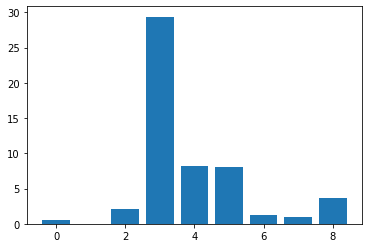

In [126]:
from pandas import  read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  # format all fields as string
  X = X.astype(str)
  return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.transform(X_test)
  return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return  y_train_enc, y_test_enc
# feature selection
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=chi2, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs  

# load the dataset
X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' %(i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()



# Mutual Information Feature Selection

Feature 0: 0.000901
Feature 1: 0.000000
Feature 2: 0.034466
Feature 3: 0.009592
Feature 4: 0.019374
Feature 5: 0.032979
Feature 6: 0.010592
Feature 7: 0.090366
Feature 8: 0.000000


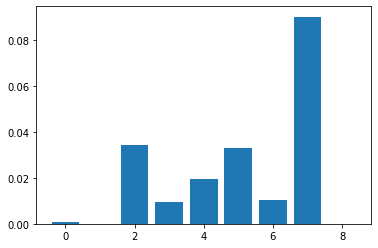

In [132]:
# feature selection 
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# load the dataset
def load_datatset(filename):
  # load the dataset as a pandas DataFrame
  data = read_csv(filename, header= None)
  # retrieve numpy array
  dataset = data.values
  # split into input(X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  # format all feilds as string
  X = X.astype(str)
  return X, y

# prepare input data
def prepare_input(X_train, X_test):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.transform(X_test)
  return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=mutual_info_classif, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs =fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

# load the dataset
X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# features selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' %(i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Modeling with Selected Features

Model Built using all Features

In [160]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score

# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas Dataframe
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input(X) and output(y) variables
  X = dataset[:,:-1]
  y = dataset[:,-1]
  # format all fields as string
  X = X.astype(str)
  return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.transform(X_test)
  return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test, option = 'chi2'):
  if option == 'chi2':
    fs = SelectKBest(score_func=chi2, k =4)
  elif option == 'muif':
    fs = SelectKBest(score_func=mutual_info_classif, k=4)
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs


# load the dataset
X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
X_train_fs2, X_test_fs2 = select_features(X_train_enc, y_train_enc, X_test_enc,option = 'muif')
# fit the model1 
model1 = LogisticRegression(solver='lbfgs')
model1.fit(X_train_enc, y_train_enc)
# 2nd model with 4 feature
model2 = LogisticRegression(solver='lbfgs')
model2.fit(X_train_fs, y_train_enc)
# 3rd model with 4 feature
model3 = LogisticRegression(solver='lbfgs')
model3.fit(X_train_fs2, y_train_enc)
# evaluate the model
yhat1 = model.predict(X_test_enc)
yhat2 = model2.predict(X_test_fs)
yhat3  = model3.predict(X_test_fs2)
# evaluate predictions
acc1 = accuracy_score(y_test_enc, yhat)
acc2 = accuracy_score(y_test_enc, yhat2)
acc3 = accuracy_score(y_test_enc, yhat3)
print('Accuracy of Model 1: %.2f, Model 2: %.2f, Model 3: %.2f' % (acc1*100, acc2*100, acc3*100))

Accuracy of Model 1: 75.79, Model 2: 74.74, Model 3: 74.74


Model Built Using CHi-Squared Features